# **Social Network Analysis for Signed Networks**

# **1. About the Dataset: (Reference - <a href='https://snap.stanford.edu/data/soc-RedditHyperlinks.html'>https://snap.stanford.edu/data/soc-RedditHyperlinks.html</a>)**

**Dataset Information:**

The provided dataset consists of two main components: the subreddit hyperlink network and subreddit embeddings. Here's an overview of each:

**Subreddit Hyperlink Network:**
The subreddit-to-subreddit hyperlink network captures directed connections between two subreddits, extracted from publicly available Reddit data spanning 2.5 years from Jan 2014 to April 2017. Each hyperlink originates from a post in the source community and links to a post in the target community. Properties of each hyperlink include the timestamp, sentiment of the source community post towards the target community post, and the text property vector of the source post. The network is directed, signed (with edge weights of -1 or +1), temporal, and attributed. Two separate files are provided for hyperlinks present in post titles and post bodies, respectively.

**Subreddit Embeddings:**
Subreddit embeddings are provided as embedding vectors representing each subreddit in the dataset. These embeddings aim to capture semantic information about each subreddit's content and community. Note that some subreddit embeddings could not be generated, resulting in 51,278 embeddings in the provided file.

**Dataset Statistics:**
- Number of nodes (subreddits): 55,863
- Number of edges (hyperlinks between subreddits): 858,490
- Edge weights (label of hyperlink): -1 or +1
- Edge attributes: Text property vectors


The following code offers specific characteristic features of the Reddit Network we utilized:
1. Number of Nodes
2. Number of Edges
3. Clustering Coefficient
4. Highest Degree
5. Diameter
6. Modularity
7. Degree Centrality




In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
file_path = "data/soc-redditHyperlinks-body.tsv"
df = pd.read_csv(file_path, sep="\t")

In [ ]:
print(df.head)

<bound method NDFrame.head of            SOURCE_SUBREDDIT   TARGET_SUBREDDIT  POST_ID            TIMESTAMP  \
0           leagueoflegends    teamredditteams  1u4nrps  2013-12-31 16:39:58   
1                theredlion             soccer   1u4qkd  2013-12-31 18:18:37   
2              inlandempire             bikela  1u4qlzs  2014-01-01 14:54:35   
3                       nfl                cfb  1u4sjvs  2013-12-31 17:37:55   
4                playmygame            gamedev  1u4w5ss  2014-01-01 02:51:13   
...                     ...                ...      ...                  ...   
286556           negareddit      debatefascism  68im20s  2017-04-30 16:31:26   
286557          mildlynomil          justnomil  68imlas  2017-04-30 04:19:03   
286558               mmorpg  blackdesertonline  68ip5os  2017-04-30 16:54:08   
286559  electricskateboards          askreddit  68ipb2s  2017-04-30 16:41:53   
286560                mgtow    dataisbeautiful  68ipeos  2017-04-30 16:52:59   

        L

In [ ]:
# Create a directed graph from the dataset
G = nx.DiGraph()
G.add_edges_from(zip(df["SOURCE_SUBREDDIT"], df["TARGET_SUBREDDIT"]))

In [ ]:
# Number of nodes
num_nodes = G.number_of_nodes()
print("Number of nodes (subreddits):", num_nodes)

# Number of edges
num_edges = G.number_of_edges()
print("Number of edges (hyperlinks):", num_edges)

# Clustering coefficient
cc = nx.average_clustering(G)
print("Clustering coefficient:", cc)

# Highest degree
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
highest_degree = degree_sequence[0]
print("Highest degree:", highest_degree)

Number of nodes (subreddits): 35776
Number of edges (hyperlinks): 137821
Clustering coefficient: 0.139306128836154
Highest degree: 2524


In [ ]:
# Ensure the graph is connected by considering the largest strongly connected component
largest_strongly_connected_component = max(nx.strongly_connected_components(G), key=len)
G_largest_component = G.subgraph(largest_strongly_connected_component)

# Diameter
diameter = nx.diameter(G_largest_component)
print("Diameter:", diameter)

# Modularity
communities = nx.algorithms.community.modularity_max.greedy_modularity_communities(G)
modularity = nx.algorithms.community.modularity(G, communities)
print("Modularity:", modularity)

Diameter: 12
Modularity: 0.4687780955636417


In [ ]:
# Degree centrality
degree_centrality = nx.degree_centrality(G)
top_subreddits = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]
print("\nTop 5 subreddits by degree centrality:")
for subreddit in top_subreddits:
    print(f"{subreddit}: {degree_centrality[subreddit]:.4f}")


Top 5 subreddits by degree centrality:
askreddit: 0.0706
iama: 0.0567
subredditdrama: 0.0504
writingprompts: 0.0319
outoftheloop: 0.0307


# **2. Network Visualization:**
Visualizing the entire Reddit Social network using <b>Frutcherman Reingold Layout</b>

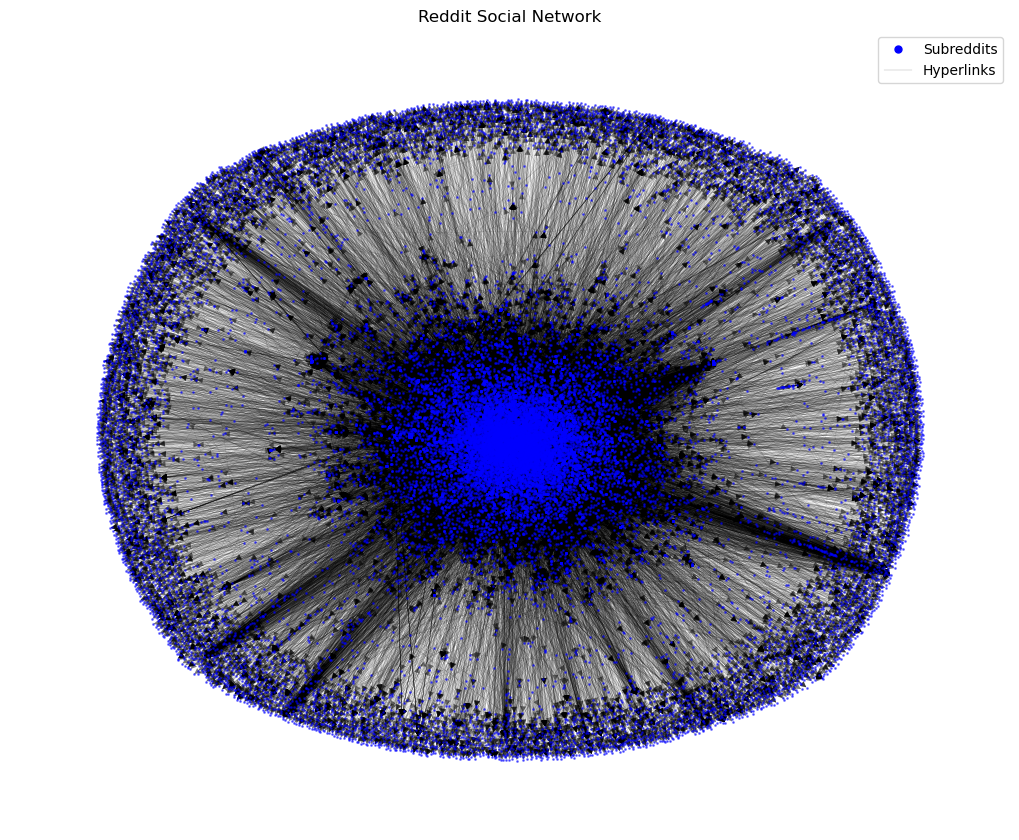

In [ ]:

# Visualize the graph using the Fruchterman-Reingold layout algorithm
pos = nx.fruchterman_reingold_layout(G)
plt.figure(figsize=(10, 8))
nx.draw(G, pos=pos, node_size=1, width=0.1, node_color='blue', edge_color='black', alpha=0.5)

# Add title
plt.title("Reddit Social Network")

# Add legends
nodes_legend = plt.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=5, label='Subreddits')
edges_legend = plt.Line2D([], [], color='black', linewidth=0.1, label='Hyperlinks')
plt.legend(handles=[nodes_legend, edges_legend])

plt.show()

# **3. Sentiment Analysis**

Positive,Negative and Compound sentiments scores calculated by VADER are shown below:

In [ ]:
# Extract sentiment scores from PROPERTIES column
def extract_sentiments(properties):
    properties_list = properties.split(',')
    return {
        'Positive_Sentiment': float(properties_list[18]),  # Positive sentiment score
        'Negative_Sentiment': float(properties_list[19]),  # Negative sentiment score
        'Compound_Sentiment': float(properties_list[20])   # Compound sentiment score
    }

In [ ]:
# Apply function to extract sentiment scores
sentiments_df = df['PROPERTIES'].apply(extract_sentiments).apply(pd.Series)

In [ ]:
# Concatenate extracted sentiment scores with original dataframe
data_with_sentiments = pd.concat([df, sentiments_df], axis=1)

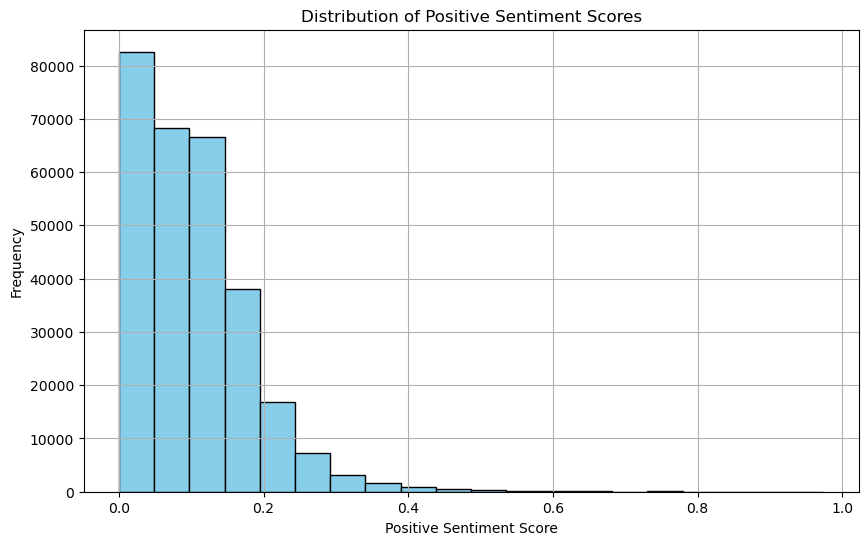

In [ ]:
# Histogram for Positive Sentiment
plt.figure(figsize=(10, 6))
plt.hist(data_with_sentiments['Positive_Sentiment'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Positive Sentiment Scores')
plt.xlabel('Positive Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Analysis on "Distribution of Positive Sentiment Scores":**

The graph illustrates the distribution of positive sentiment scores, revealing that a majority of observations exhibit low positive sentiment. Specifically, the most common score range lies between 0.0 and 0.2. As the positive sentiment score increases, the frequency of occurrences sharply declines. Notably, only a small proportion of observations demonstrate high positive sentiment (above 0.6).


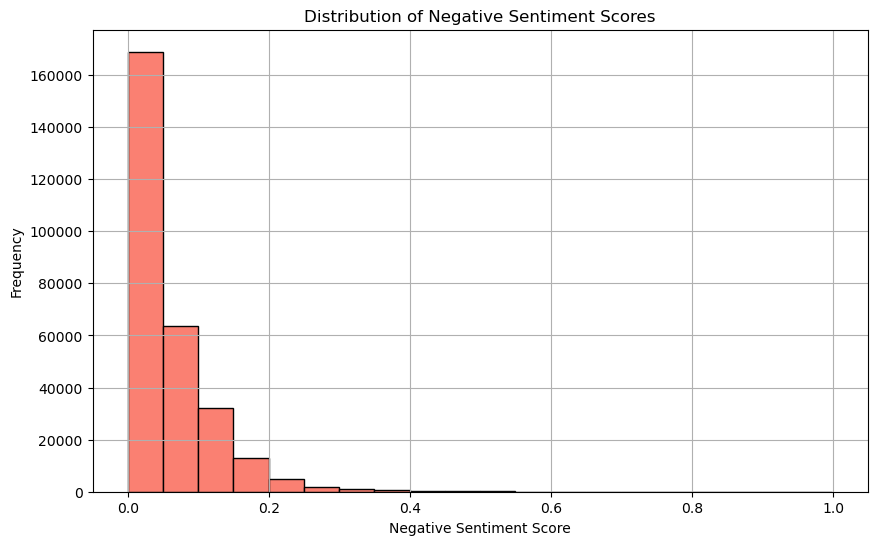

In [ ]:
# Histogram for Negative Sentiment
plt.figure(figsize=(10, 6))
plt.hist(data_with_sentiments['Negative_Sentiment'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Negative Sentiment Scores')
plt.xlabel('Negative Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Analysis on "Distribution of Negative Sentiment Scores":**

The graph displays the distribution of negative sentiment scores. Notably, a significant number of observations fall within the 0.0 to 0.2 range on the x-axis, indicating a high frequency of low negative sentiment scores. As the negative sentiment score increases, the frequency of occurrences sharply declines. Overall, the data suggests that most of the analyzed content exhibits mild negative sentiment, with relatively few instances of strongly negative sentiment.


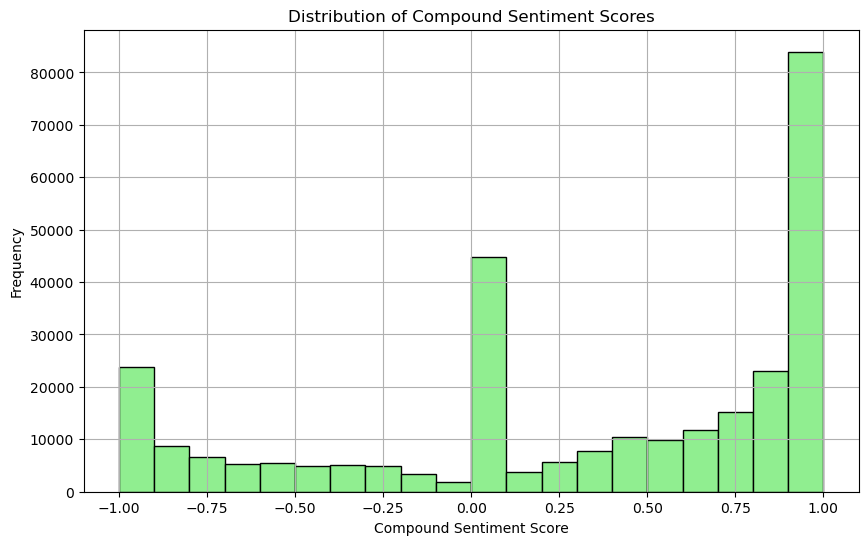

In [ ]:
# Histogram for Compound Sentiment
plt.figure(figsize=(10, 6))
plt.hist(data_with_sentiments['Compound_Sentiment'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Analysis on "Distribution of Compound Sentiment Scores":**

The graph reveals a bimodal distribution of compound sentiment scores. Most data points cluster around neutral sentiment (near 0.00), while another peak occurs at highly positive sentiment (1.00). Overall, the data suggests a prevalence of neutral content with occasional strongly positive expressions.

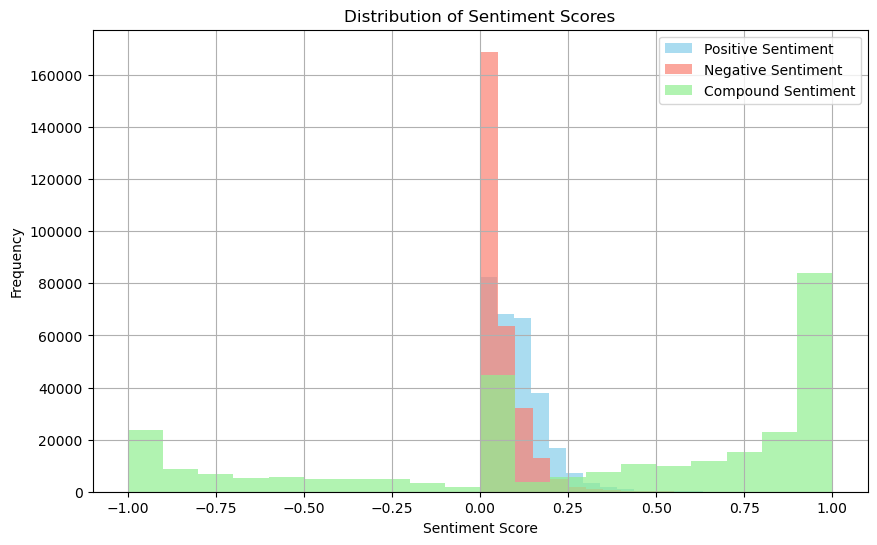

In [ ]:
# Histogram for Sentiment Scores
plt.figure(figsize=(10, 6))
plt.hist(data_with_sentiments['Positive_Sentiment'], bins=20, color='skyblue', alpha=0.7, label='Positive Sentiment')
plt.hist(data_with_sentiments['Negative_Sentiment'], bins=20, color='salmon', alpha=0.7, label='Negative Sentiment')
plt.hist(data_with_sentiments['Compound_Sentiment'], bins=20, color='lightgreen', alpha=0.7, label='Compound Sentiment')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()



**Analysis on "Distribution of sentiment scores:"**

The sentiment analysis graph reveals a fascinating mix of opinions. It shows a clear peak at neutral sentiment, suggesting a large portion of factual or unemotional content. Interestingly, positive sentiment has two peaks: one for mildly positive statements and another for highly positive ones, indicating both casual satisfaction and strong endorsements. While there's a smaller peak for mildly negative sentiment, the overall distribution leans towards positivity. This analysis offers valuable insights into the emotional landscape of the analyzed content.

**<h2>4. Degree Distribution & Clustering Coefficient Analysis:</h2>**

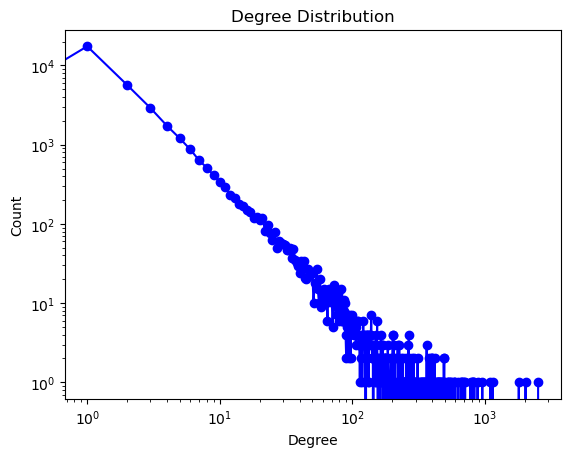

Clustering Coefficient: 0.1393


In [ ]:
# Plot the degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = nx.degree_histogram(G)
plt.loglog(degree_count, 'b-', marker='o')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

# Calculate the clustering coefficient
clustering_coefficient = nx.average_clustering(G)
print(f"Clustering Coefficient: {clustering_coefficient:.4f}")

**<h2>5. Visualization of Positive and Negative Sentiment Networks</h2>**

The below code segment constructs two directed networks, `positive_network` and `negative_network`, representing positive and negative sentiment interactions between subreddits, respectively. It iterates through the DataFrame containing subreddit interactions, extracting the source, target, and sentiment of each interaction. If an interaction is positive and involves subreddits with positive sentiment, it adds an edge to `positive_network`. Similarly, if an interaction is negative and involves subreddits with negative sentiment, it adds an edge to `negative_network`. This approach enables the analysis of sentiment dynamics within the subreddit network, offering insights into how positive and negative sentiments shape interactions and relationships between subreddits.

In [ ]:
# Filter positive and negative interactions
positive_users = set(df[df['LINK_SENTIMENT'] == 1]['SOURCE_SUBREDDIT'])
negative_users = set(df[df['LINK_SENTIMENT'] == -1]['SOURCE_SUBREDDIT'])

In [ ]:

positive_network = nx.DiGraph()
negative_network = nx.DiGraph()

# Step 3: Construct positive and negative sentiment networks
for index, row in df.iterrows():
    source = row['SOURCE_SUBREDDIT']
    target = row['TARGET_SUBREDDIT']
    sentiment = row['LINK_SENTIMENT']

    # Add edge to positive network if both source and target have positive sentiment
    if source in positive_users and target in positive_users and sentiment == 1:
        positive_network.add_edge(source, target)

    # Add edge to negative network if both source and target have negative sentiment
    if source in negative_users and target in negative_users and sentiment == -1:
        negative_network.add_edge(source, target)

In [ ]:
# Create a function to visualize the sentiment network
def visualize_network(network, title):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(network)  # Layout the nodes using the spring layout algorithm
    nx.draw(network, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=10, font_weight='bold', edge_color='gray', arrows=True)
    plt.title(title)
    plt.show()

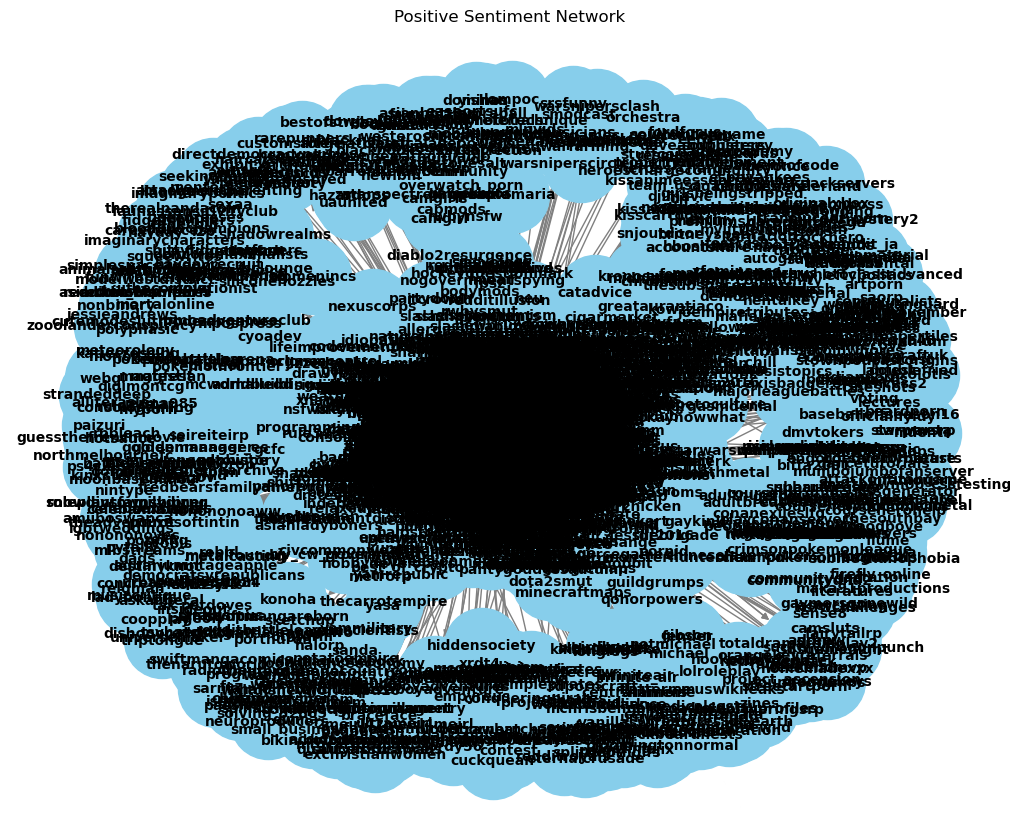

In [ ]:
# Visualize the positive sentiment network
visualize_network(positive_network, "Positive Sentiment Network")


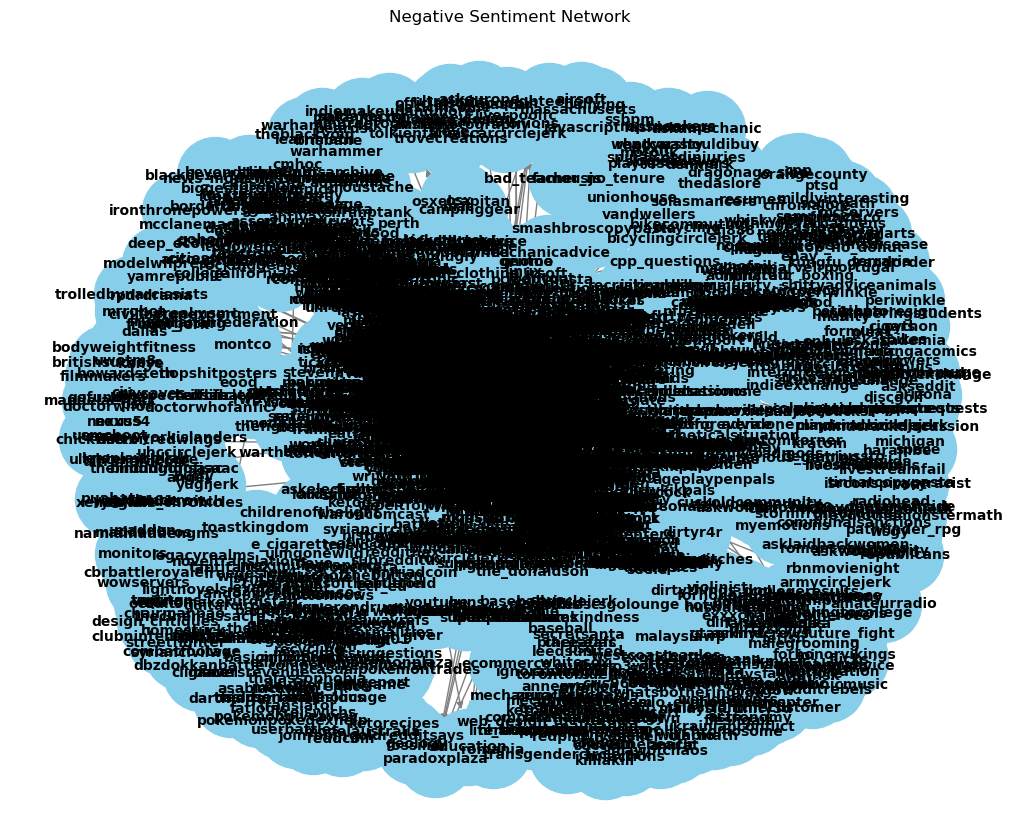

In [ ]:
# Visualize the negative sentiment network
visualize_network(negative_network, "Negative Sentiment Network")


**<h2>6. Centrality Measures Based Analysis for positive and negative network</h2>**

Degree centrality, betweenness centrality  offer valuable insights into the structure and dynamics of our Reddit network.

Degree centrality serves as an indicator of a Reddit user's prominence within the network. A user with high degree centrality has numerous connections, suggesting that their posts or comments may reach a broad audience, thus enhancing the network's navigability.

Betweenness centrality identifies users who serve as crucial intermediaries between distinct groups within the Reddit network. These users facilitate communication and enhance network cohesion by bridging gaps between communities, thereby simplifying navigation for users seeking diverse perspectives.

In summary, analyzing these top centrality measures provides valuable insights of our Reddit network, enabling the identification of prominent, bridging, and influential users who play pivotal roles in shaping user interactions and content dissemination.

In [ ]:
# Calculate degree centrality for positive network
positive_degree_centrality = nx.degree_centrality(positive_network)

# Calculate betweenness centrality for positive network
positive_betweenness_centrality = nx.betweenness_centrality(positive_network)

# Calculate degree centrality for negative network
negative_degree_centrality = nx.degree_centrality(negative_network)

# Calculate betweenness centrality for negative network
negative_betweenness_centrality = nx.betweenness_centrality(negative_network)


In [ ]:
# Function to print top N centrality measures
def print_top_n_centrality(centrality_dict, n):
    sorted_centrality = sorted(centrality_dict.items(), key=lambda x: x[1], reverse=True)
    for i, (user, centrality) in enumerate(sorted_centrality[:n], start=1):
        print(f"{i}. {user}: {centrality}")

# Print top 10 centrality measures for positive network
print("Top 10 Positive Network Centrality Measures:")
print("Degree Centrality:")
print_top_n_centrality(positive_degree_centrality, 10)
print("\nBetweenness Centrality:")
print_top_n_centrality(positive_betweenness_centrality, 10)

# Print top 10 centrality measures for negative network
print("\nTop 10 Negative Network Centrality Measures:")
print("Degree Centrality:")
print_top_n_centrality(negative_degree_centrality, 10)
print("\nBetweenness Centrality:")
print_top_n_centrality(negative_betweenness_centrality, 10)


Top 10 Positive Network Centrality Measures:
Degree Centrality:
1. askreddit: 0.09009216589861752
2. iama: 0.07523041474654378
3. subredditdrama: 0.0532642089093702
4. writingprompts: 0.038172043010752686
5. outoftheloop: 0.03744239631336405
6. pics: 0.03448540706605223
7. videos: 0.031144393241167436
8. leagueoflegends: 0.029646697388632872
9. gaming: 0.02857142857142857
10. funny: 0.02772657450076805

Betweenness Centrality:
1. askreddit: 0.06096326856674448
2. iama: 0.05471562903413405
3. subredditdrama: 0.048473471701652594
4. outoftheloop: 0.03426170360331928
5. writingprompts: 0.0179066516444868
6. leagueoflegends: 0.01520244229989276
7. gaming: 0.01469648333418145
8. legaladvice: 0.014143657158940295
9. conspiracy: 0.011276961224497846
10. dogecoin: 0.010920264791801238

Top 10 Negative Network Centrality Measures:
Degree Centrality:
1. subredditdrama: 0.15657439446366783
2. askreddit: 0.13148788927335642
3. drama: 0.07785467128027682
4. conspiracy: 0.046424452133794696
5. news:

# **7. Community Detection**

Community detection is the process of
identifying groups of nodes in a
network that are more densely
connected to each other than to the rest
of the network.

There are various community detection algorithms, and each algorithm has its own strengths and weaknesses. Some of the popular community detection algorithms are:


1. **Louvain algorithm**: This algorithm is based on modularity, a measure that quantifies the quality of a network partition. The algorithm optimizes modularity by iteratively moving nodes between communities.

2. **Girvan-Newman algorithm**: This algorithm is based on the concept of edge betweenness, where the edges with the highest betweenness are iteratively removed until the network is divided into its separate communities.



# **Visualization of Positive and Negative Louvain Communities**



In [ ]:
# Function to visualize communities
def visualize_communities(graph, communities, title):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(graph)
    cmap = plt.get_cmap('viridis')
    partition = {}
    for i, community in enumerate(communities):
        for node in community:
            partition[node] = i
    node_colors = [partition.get(node) for node in graph.nodes()]
    nx.draw_networkx_nodes(graph, pos, node_size=300, cmap=cmap, node_color=node_colors)
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    plt.title(title)
    plt.show()

In [ ]:
import networkx as nx
from networkx.algorithms import community
import leidenalg
import igraph as ig

In [ ]:
# Community detection with Louvain Modularity
positive_louvain_communities = list(community.greedy_modularity_communities(positive_network))
negative_louvain_communities = list(community.greedy_modularity_communities(negative_network))

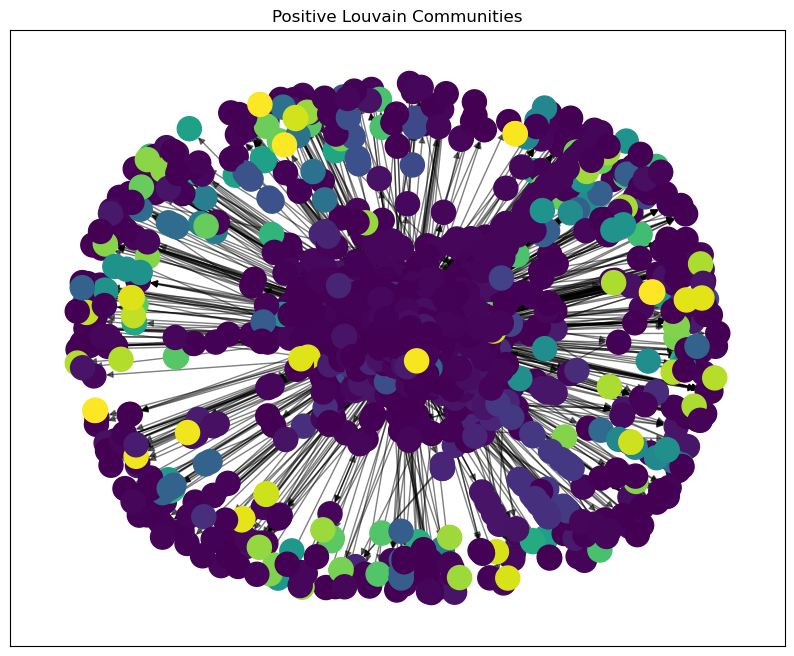

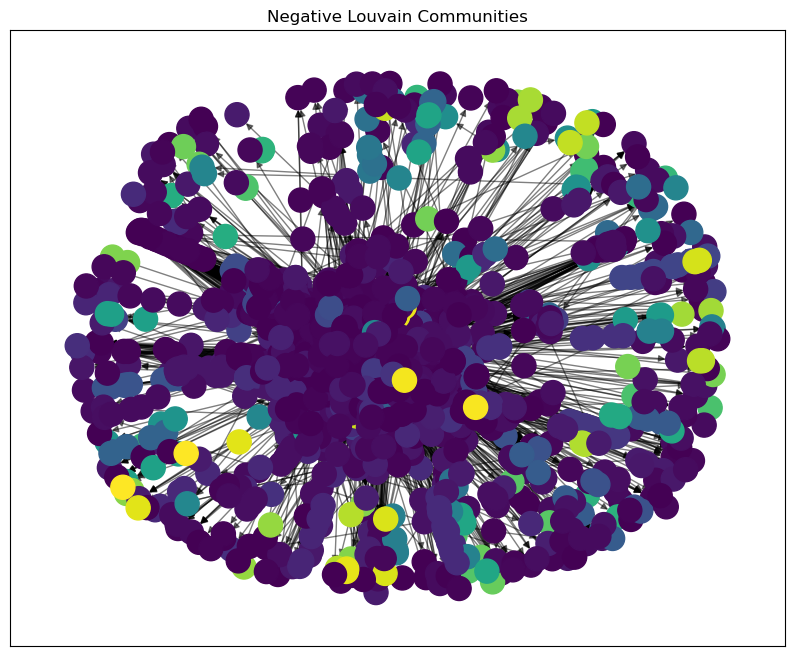

In [ ]:
# Visualize communities for positive network
visualize_communities(positive_network, positive_louvain_communities, "Positive Louvain Communities")
visualize_communities(negative_network, negative_louvain_communities, "Negative Louvain Communities")

**Analysis of positive and negative Louvain communities**

The comparison between positive and negative Louvain communities provides crucial insights into the social dynamics and interaction patterns within the Reddit community. \\
Positive Louvain communities represent vibrant clusters of interconnected users who engage actively with each other, likely indicating shared interests, collaborative discussions, and supportive interactions. These positive communities contribute to the vitality and cohesion of the Reddit network by facilitating the exchange of information, fostering community engagement, and strengthening social bonds among users. \\
On the other hand, negative Louvain communities, characterized by fewer nodes and minimal connections, suggest isolated or less engaged user groups with limited interaction. Understanding these differences in community structure and activity levels can help Reddit moderators, administrators, and researchers identify key areas for community management, content moderation, and fostering positive user experiences within the Reddit platform.

# **Visualization of Positive and Negative Communities using Girvan-Newmann algorithm**

In [ ]:
df1 = df.head(35000)

In [ ]:
# Filter positive and negative interactions
positive_users = set(df1[df1['LINK_SENTIMENT'] == 1]['SOURCE_SUBREDDIT'])
negative_users = set(df1[df1['LINK_SENTIMENT'] == -1]['SOURCE_SUBREDDIT'])

In [ ]:
positive_network = nx.DiGraph()
negative_network = nx.DiGraph()

# Step 3: Construct positive and negative sentiment networks
for index, row in df.iterrows():
    source = row['SOURCE_SUBREDDIT']
    target = row['TARGET_SUBREDDIT']
    sentiment = row['LINK_SENTIMENT']

    # Add edge to positive network if both source and target have positive sentiment
    if source in positive_users and target in positive_users and sentiment == 1:
        positive_network.add_edge(source, target)

    # Add edge to negative network if both source and target have negative sentiment
    if source in negative_users and target in negative_users and sentiment == -1:
        negative_network.add_edge(source, target)

In [ ]:
# Convert directed graphs to undirected graphs
positive_undirected_network = positive_network.to_undirected()
negative_undirected_network = negative_network.to_undirected()

In [ ]:
# Community detection with Girvan-Newman Algorithm
positive_girvan_communities = next(community.girvan_newman(positive_undirected_network))

In [ ]:
negative_girvan_communities = next(community.girvan_newman(negative_undirected_network))

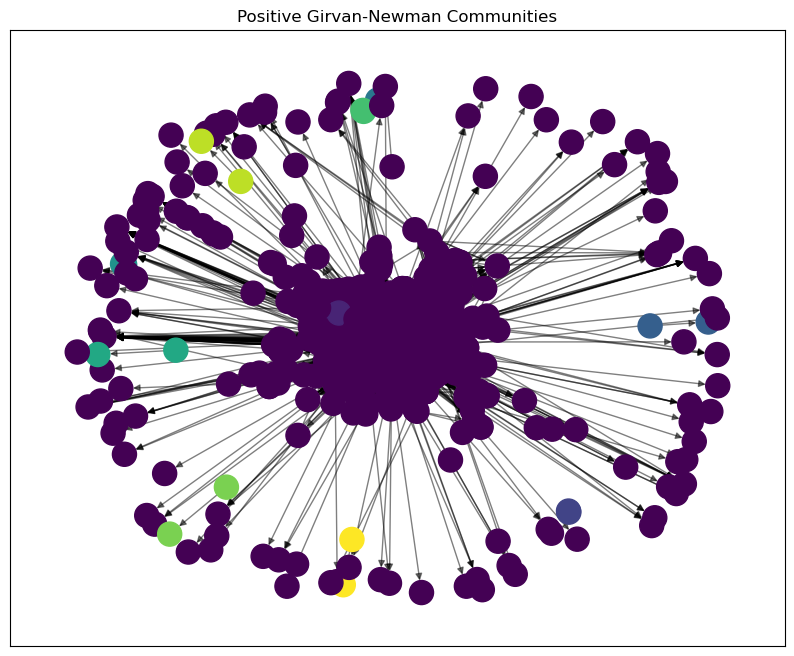

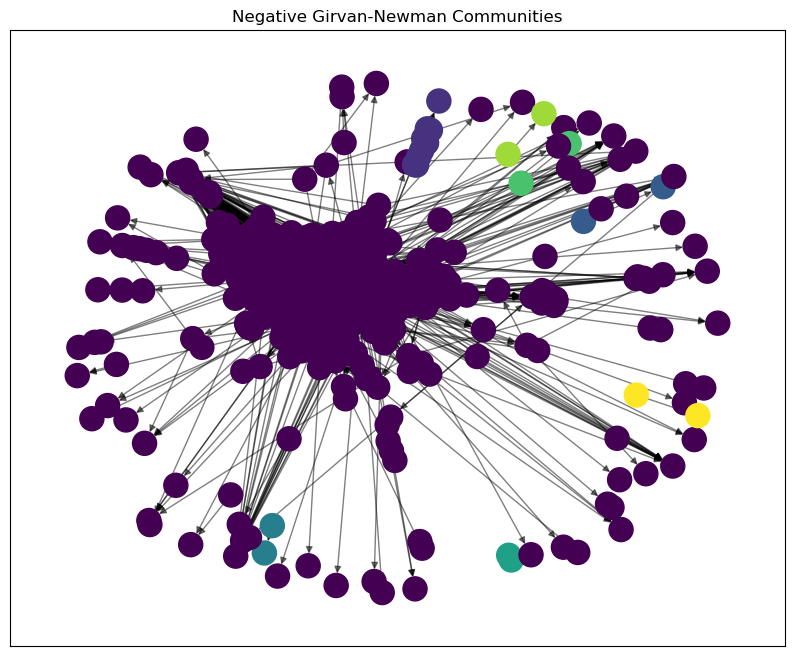

In [ ]:
# Visualize communities for negative network
visualize_communities(positive_network, positive_girvan_communities, "Positive Girvan-Newman Communities")
visualize_communities(negative_network, negative_girvan_communities, "Negative Girvan-Newman Communities")

**Analysis of positive and negative communities resulting from the Girvan-Newman algorithm:**

The Girvan-Newman algorithm, applied to the Reddit network, uncovers positive communities by iteratively removing bridges between groups. A higher number of bridges needing removal indicates stronger and more distinct communities. Positive communities represent cohesive groups of users sharing similar interests, fostering meaningful interactions and content sharing within specific topics or themes. This algorithmic approach offers insights into the diverse interests and subcultures within the Reddit network.

Conversely, the Girvan-Newman algorithm identifies negative communities by determining the number of additional bridges that could be added before all users become interconnected. Higher potential bridge counts suggest weaker communities with less distinct boundaries. Negative communities indicate areas of overlapping interests or discussions among users, with less defined community boundaries. Understanding both positive and negative communities provides valuable insights into the structure and dynamics of the Reddit network, reflecting cohesive groups and interconnectedness among users with varied interests.

# **8. Inter-community Link Analysis:**

This analysis focuses on the links that connect different communities within the network, serving as bridges between them.


In [ ]:
from networkx.algorithms import community, link_analysis

In [ ]:
# Step 1: Community detection with Louvain Modularity
positive_louvain_communities = list(community.greedy_modularity_communities(positive_network))
negative_louvain_communities = list(community.greedy_modularity_communities(negative_network))

In [ ]:
# Function to compute the number of edges between communities
def compute_community_edges(network, communities):
    community_edges = {}
    for community_id, community_nodes in enumerate(communities):
        for node in community_nodes:
            for neighbor in network.neighbors(node):
                neighbor_community = next((i for i, c in enumerate(communities) if neighbor in c), None)
                if neighbor_community is not None and neighbor_community != community_id:
                    if (community_id, neighbor_community) in community_edges:
                        community_edges[(community_id, neighbor_community)] += 1
                    else:
                        community_edges[(community_id, neighbor_community)] = 1
    return community_edges

# Function to identify bridge users or communities
def identify_bridge_users(network, communities):
    bridge_users = set()
    for node in network.nodes():
        neighbor_communities = {community_id for community_id, community_nodes in enumerate(communities) if any(neighbor in community_nodes for neighbor in network.neighbors(node))}
        if len(neighbor_communities) > 1:
            bridge_users.add(node)
    return bridge_users


# Function to visualize inter-community links and bridge users
def visualize_inter_community_links(network, communities, community_edges, bridge_users, title):
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(network)

    # Draw edges between communities
    for edge in community_edges:
        if edge[0] in pos and edge[1] in pos:  # Check if both nodes exist in the layout
            plt.plot([pos[edge[0]][0], pos[edge[1]][0]], [pos[edge[0]][1], pos[edge[1]][1]], color='grey', alpha=0.3)

    # Draw nodes for each community
    for i, community in enumerate(communities):
        nx.draw_networkx_nodes(network, pos, nodelist=community, node_color=f'C{i}', node_size=200, label=f'Community {i}')

    # Highlight bridge users
    nx.draw_networkx_nodes(network, pos, nodelist=bridge_users, node_color='red', node_size=300, label='Bridge Users')

    plt.title(f'{title} Network Inter-Community Links')
    plt.show()

def quantify_bridge_strength(network, bridge_users):
    bridge_strength = {}
    for user in bridge_users:
        total_edges = 0
        for neighbor in network.neighbors(user):
            total_edges += 1  # Increment for each edge to a neighbor
        bridge_strength[user] = total_edges
    return bridge_strength


In [ ]:
# Step 2: Analyze community connectivity
positive_community_edges = compute_community_edges(positive_network, positive_louvain_communities)
negative_community_edges = compute_community_edges(negative_network, negative_louvain_communities)

In [ ]:
# Step 3: Identify bridge users or communities
positive_bridge_users = identify_bridge_users(positive_network, positive_louvain_communities)
negative_bridge_users = identify_bridge_users(negative_network, negative_louvain_communities)

In [ ]:
# Step 4: Quantify bridge strength
positive_bridge_strength = quantify_bridge_strength(positive_network, positive_bridge_users)
negative_bridge_strength = quantify_bridge_strength(negative_network, negative_bridge_users)

# **Visualization of Positive and Negative Inter community Links**


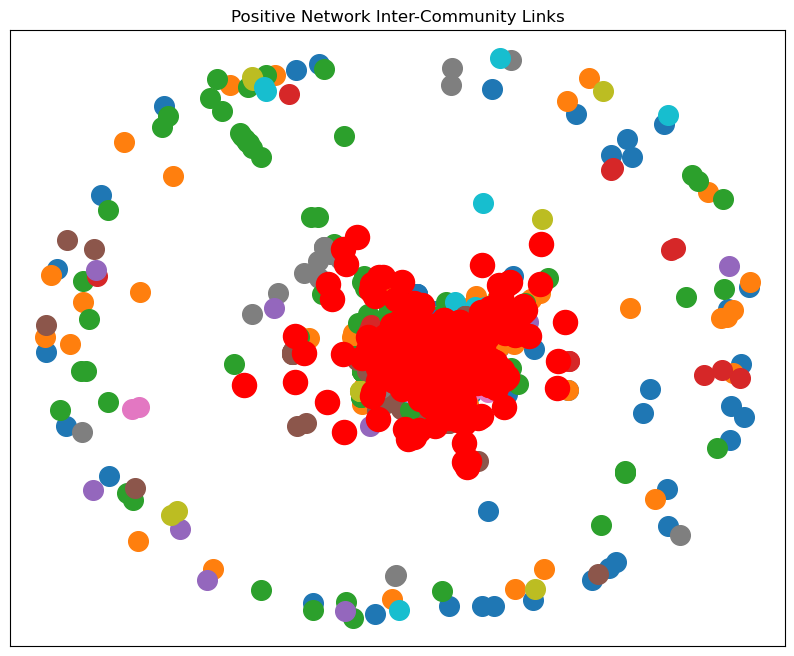

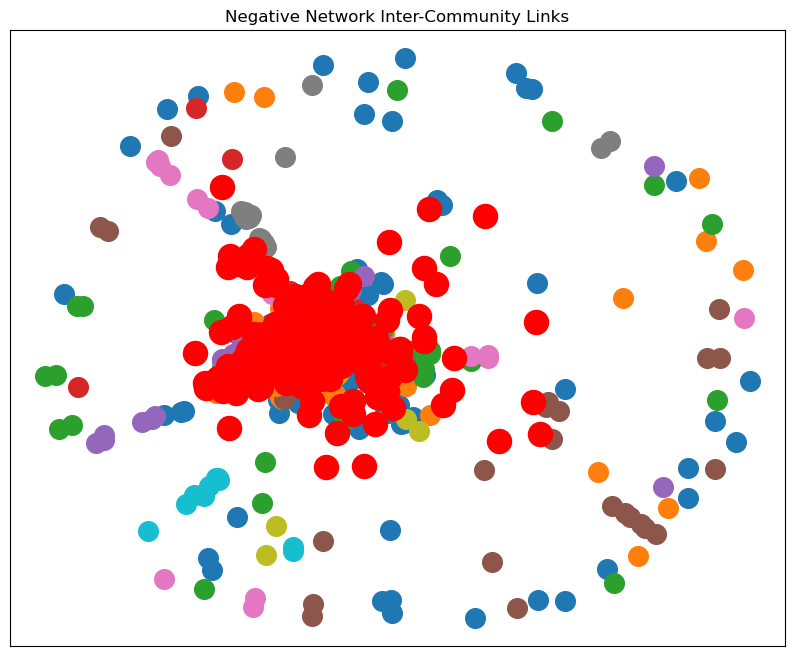

In [ ]:
# Step 5: Visualize the results
visualize_inter_community_links(positive_network, positive_louvain_communities, positive_community_edges, positive_bridge_users, "Positive")
visualize_inter_community_links(negative_network, negative_louvain_communities, negative_community_edges, negative_bridge_users, "Negative")

In [ ]:
# Function to print the number of positive and negative communities
def print_community_info(positive_communities, negative_communities, positive_network, negative_network, modularity=False):
    num_positive_communities = len(positive_communities)
    num_negative_communities = len(negative_communities)
    print(f"Number of Positive Communities: {num_positive_communities}")
    print(f"Number of Negative Communities: {num_negative_communities}")
    if modularity:
        positive_modularity_score = calculate_modularity(positive_communities, positive_network)
        negative_modularity_score = calculate_modularity(negative_communities, negative_network)
        print(f"Positive Modularity: {positive_modularity_score}")
        print(f"Negative Modularity: {negative_modularity_score}")

In [ ]:
def calculate_modularity(communities, network):
    modularity = nx.community.modularity(network, communities)
    return modularity

In [ ]:
print_community_info(positive_louvain_communities, negative_louvain_communities, positive_network, negative_network, modularity=True)

Number of Positive Communities: 56
Number of Negative Communities: 23
Positive Modularity: 0.389715344538039
Negative Modularity: 0.3366600855166365



**Analysis of positive and negative inter community links**

In a positive network, a higher number of connections or lines between groups indicates stronger intercommunity connections, implying potential collaboration or information flow between these groups. \\

Conversely, in a negative network, weak inter-community links suggest the presence of more isolated communities with limited interaction. By uncovering cross-community interactions, this analysis provides insights into how information flows between diverse subreddits on the credit network, facilitating a deeper understanding of community dynamics and connectivity patterns.